In [ ]:
import csv
import numpy as np
wine_path = '/content/winequality-white.csv'

wine_np = np.loadtxt(wine_path, skiprows=1, dtype=np.float32, delimiter=';')
col_list = next(csv.reader(open(wine_path), delimiter=';'))

In [ ]:
col_list, len(col_list)

(['fixed acidity',
  'volatile acidity',
  'citric acid',
  'residual sugar',
  'chlorides',
  'free sulfur dioxide',
  'total sulfur dioxide',
  'density',
  'pH',
  'sulphates',
  'alcohol',
  'quality'],
 12)

In [ ]:
import torch
wine = torch.from_numpy(wine_np)

In [ ]:
y = wine[:, -1].unsqueeze(1)
x = wine[:, :-1]

In [ ]:
wine.shape, x.shape, y.shape

(torch.Size([4898, 12]), torch.Size([4898, 11]), torch.Size([4898, 1]))

In [ ]:
n_sample = x.shape[0]
n_val = int(0.2*n_sample)
idx = torch.randperm(n_sample)

In [ ]:
train_idx = idx[n_val:]
val_idx = idx[:n_val]

train_x = x[train_idx]
train_y = y[train_idx]

val_x = x[val_idx]
val_y = y[val_idx]


In [ ]:
train_x.shape, val_x.shape

(torch.Size([3919, 11]), torch.Size([979, 11]))

In [ ]:
import torch.nn as nn, torch.optim as optim

In [ ]:
n = 20
from collections import OrderedDict
seq_model = nn.Sequential(OrderedDict([
    ('hiddenLinear', nn.Linear(11, n)),
    ('hiddenActivation', nn.Tanh()),
    ('outputLinear', nn.Linear(n,1))
]))

In [ ]:
def train_loop(n_epoches, model, optimizer, loss_fn, train_x, train_y, val_x, val_y):
    for epoch in range(1, 1+n_epoches):
        train_pre = model(train_x)
        train_loss = loss_fn(train_pre, train_y)
        
        with torch.no_grad():
            val_pre = model(val_x)
            val_loss = loss_fn(val_pre, val_y)
        
        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()
        
        if epoch==1 or epoch%500==0:
            print('epoch:%d, train loss: %f, val loss %f' %(epoch, train_loss, val_loss))
        

In [ ]:
lr = 1e-2
optimizer = optim.SGD(seq_model.parameters(), lr)


In [ ]:
train_loop(2000, seq_model, optimizer, nn.MSELoss(), train_x, train_y, val_x, val_y)

epoch:1, train loss: 32.708458, val loss 33.267452
epoch:500, train loss: 0.745234, val loss 0.778937
epoch:1000, train loss: 0.690759, val loss 0.716746
epoch:1500, train loss: 0.679443, val loss 0.700099
epoch:2000, train loss: 0.671664, val loss 0.691765


In [ ]:
for i in list(range(10)):
    print('output', seq_model(val_x[i]))
    print('answer', val_y[i])
    

output tensor([5.7088], grad_fn=<AddBackward0>)
answer tensor([5.])
output tensor([5.6803], grad_fn=<AddBackward0>)
answer tensor([5.])
output tensor([5.7574], grad_fn=<AddBackward0>)
answer tensor([7.])
output tensor([5.6886], grad_fn=<AddBackward0>)
answer tensor([5.])
output tensor([6.2189], grad_fn=<AddBackward0>)
answer tensor([6.])
output tensor([5.2607], grad_fn=<AddBackward0>)
answer tensor([5.])
output tensor([5.6888], grad_fn=<AddBackward0>)
answer tensor([7.])
output tensor([5.9230], grad_fn=<AddBackward0>)
answer tensor([5.])
output tensor([6.2588], grad_fn=<AddBackward0>)
answer tensor([6.])
output tensor([6.2879], grad_fn=<AddBackward0>)
answer tensor([6.])


In [ ]:
seq_model(0.1*x).detach().numpy()

array([[5.687864 ],
       [5.2856803],
       [5.445928 ],
       ...,
       [5.5166316],
       [5.429791 ],
       [5.389502 ]], dtype=float32)

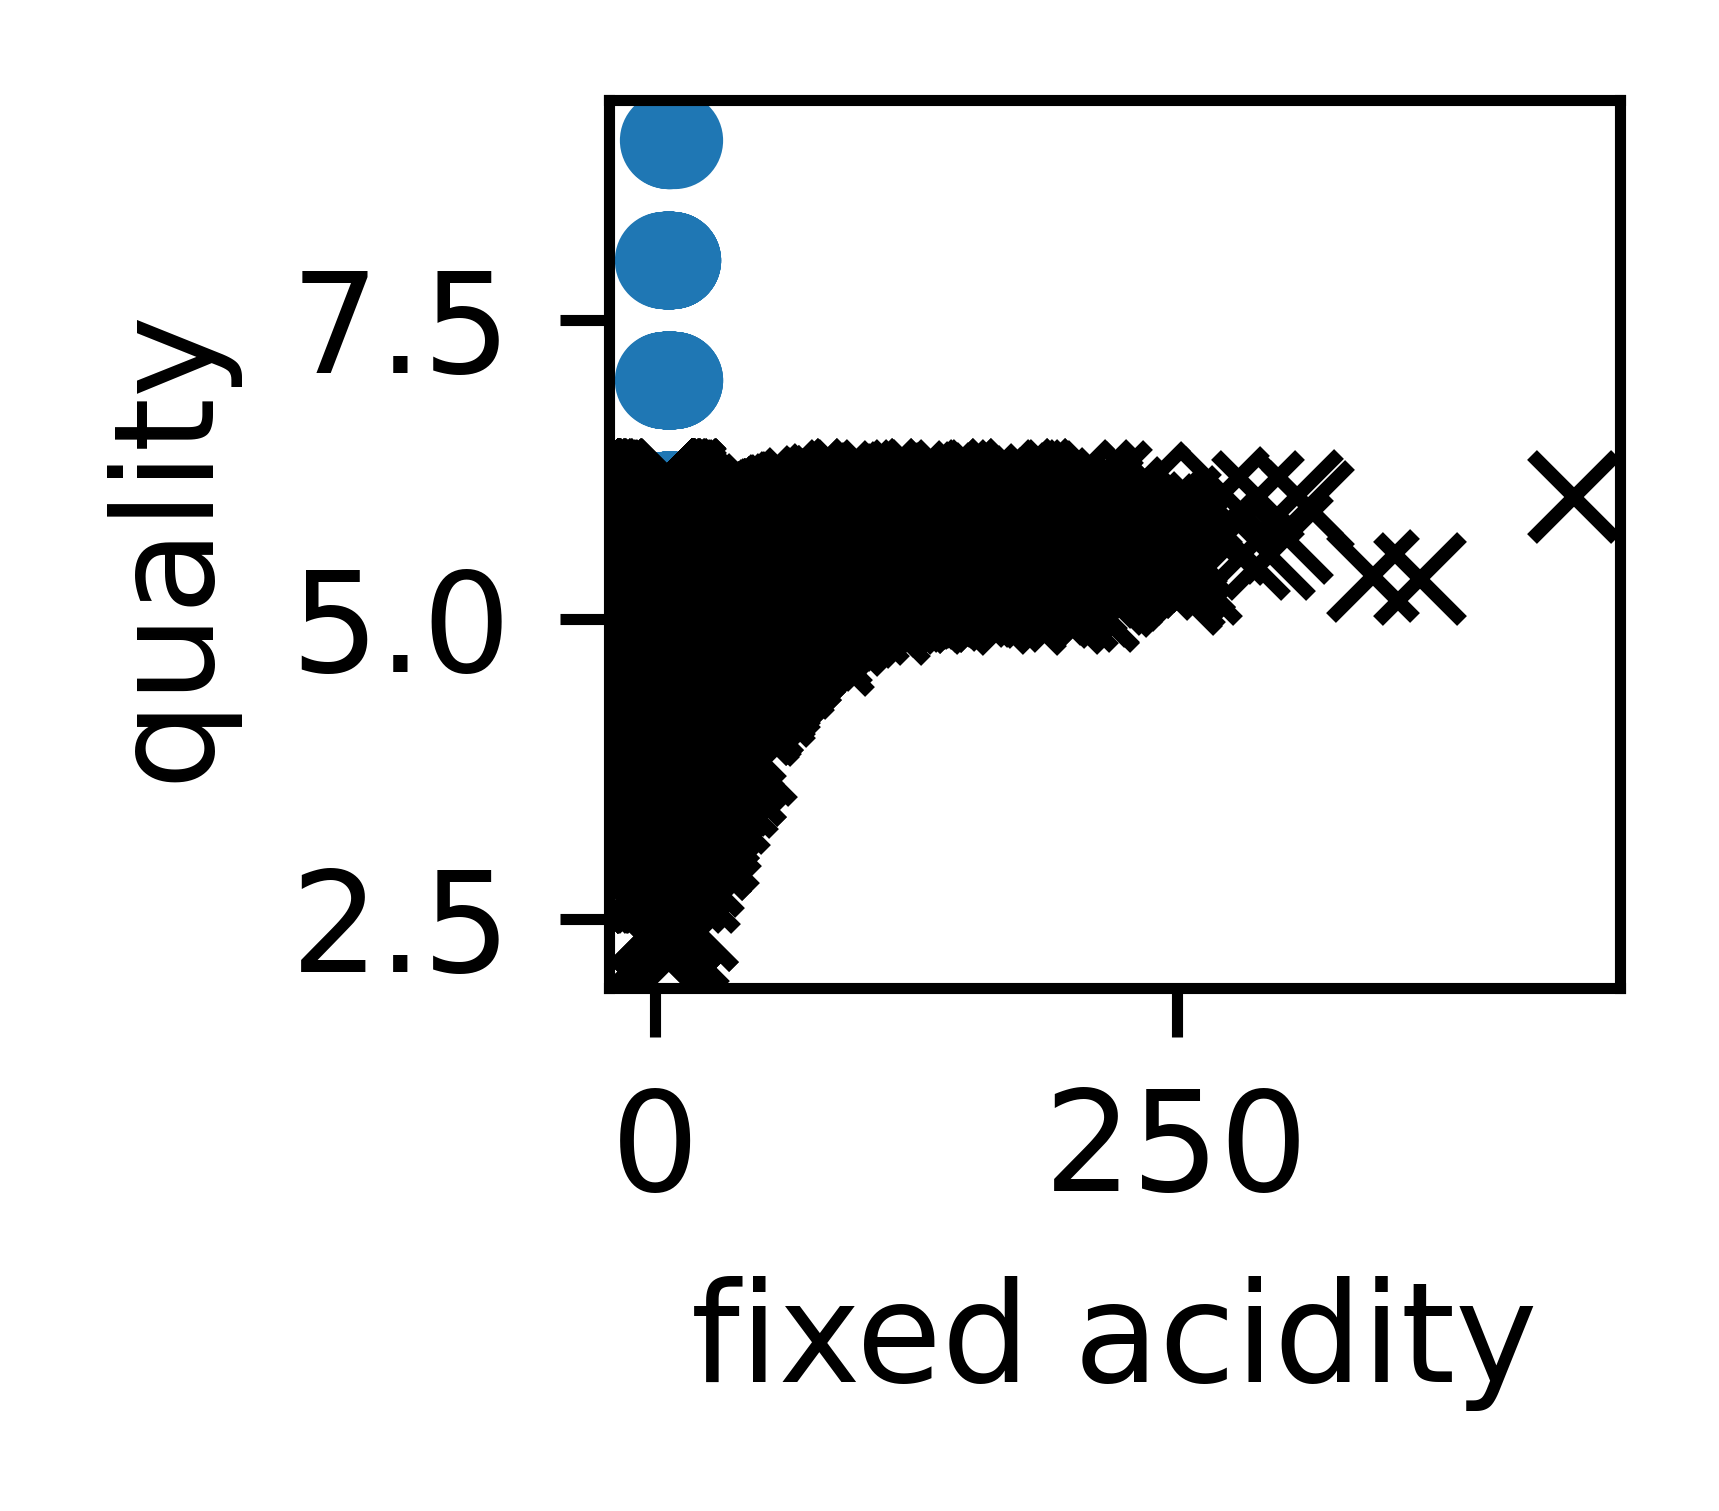

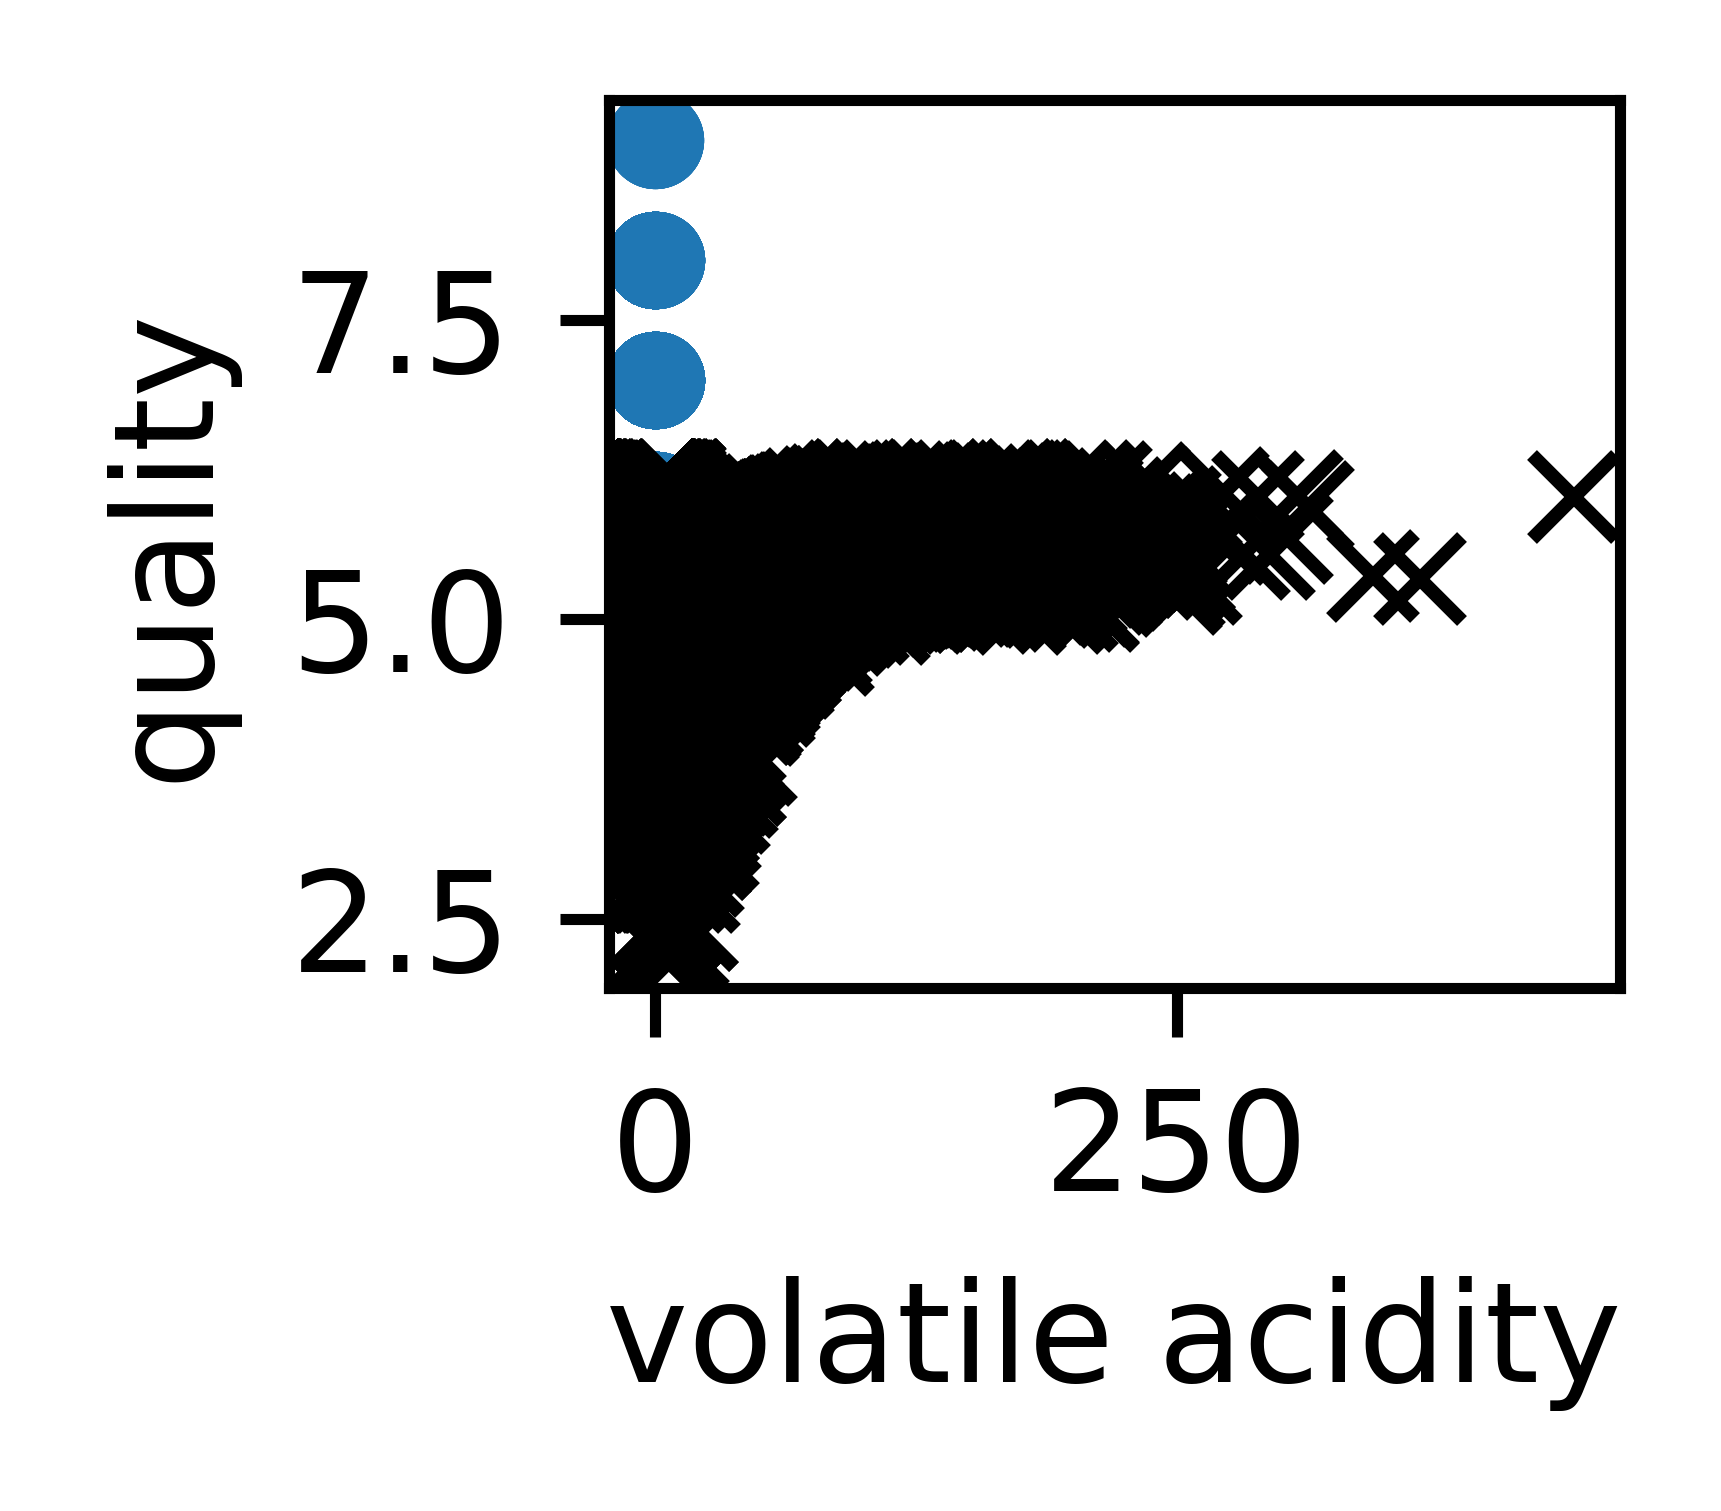

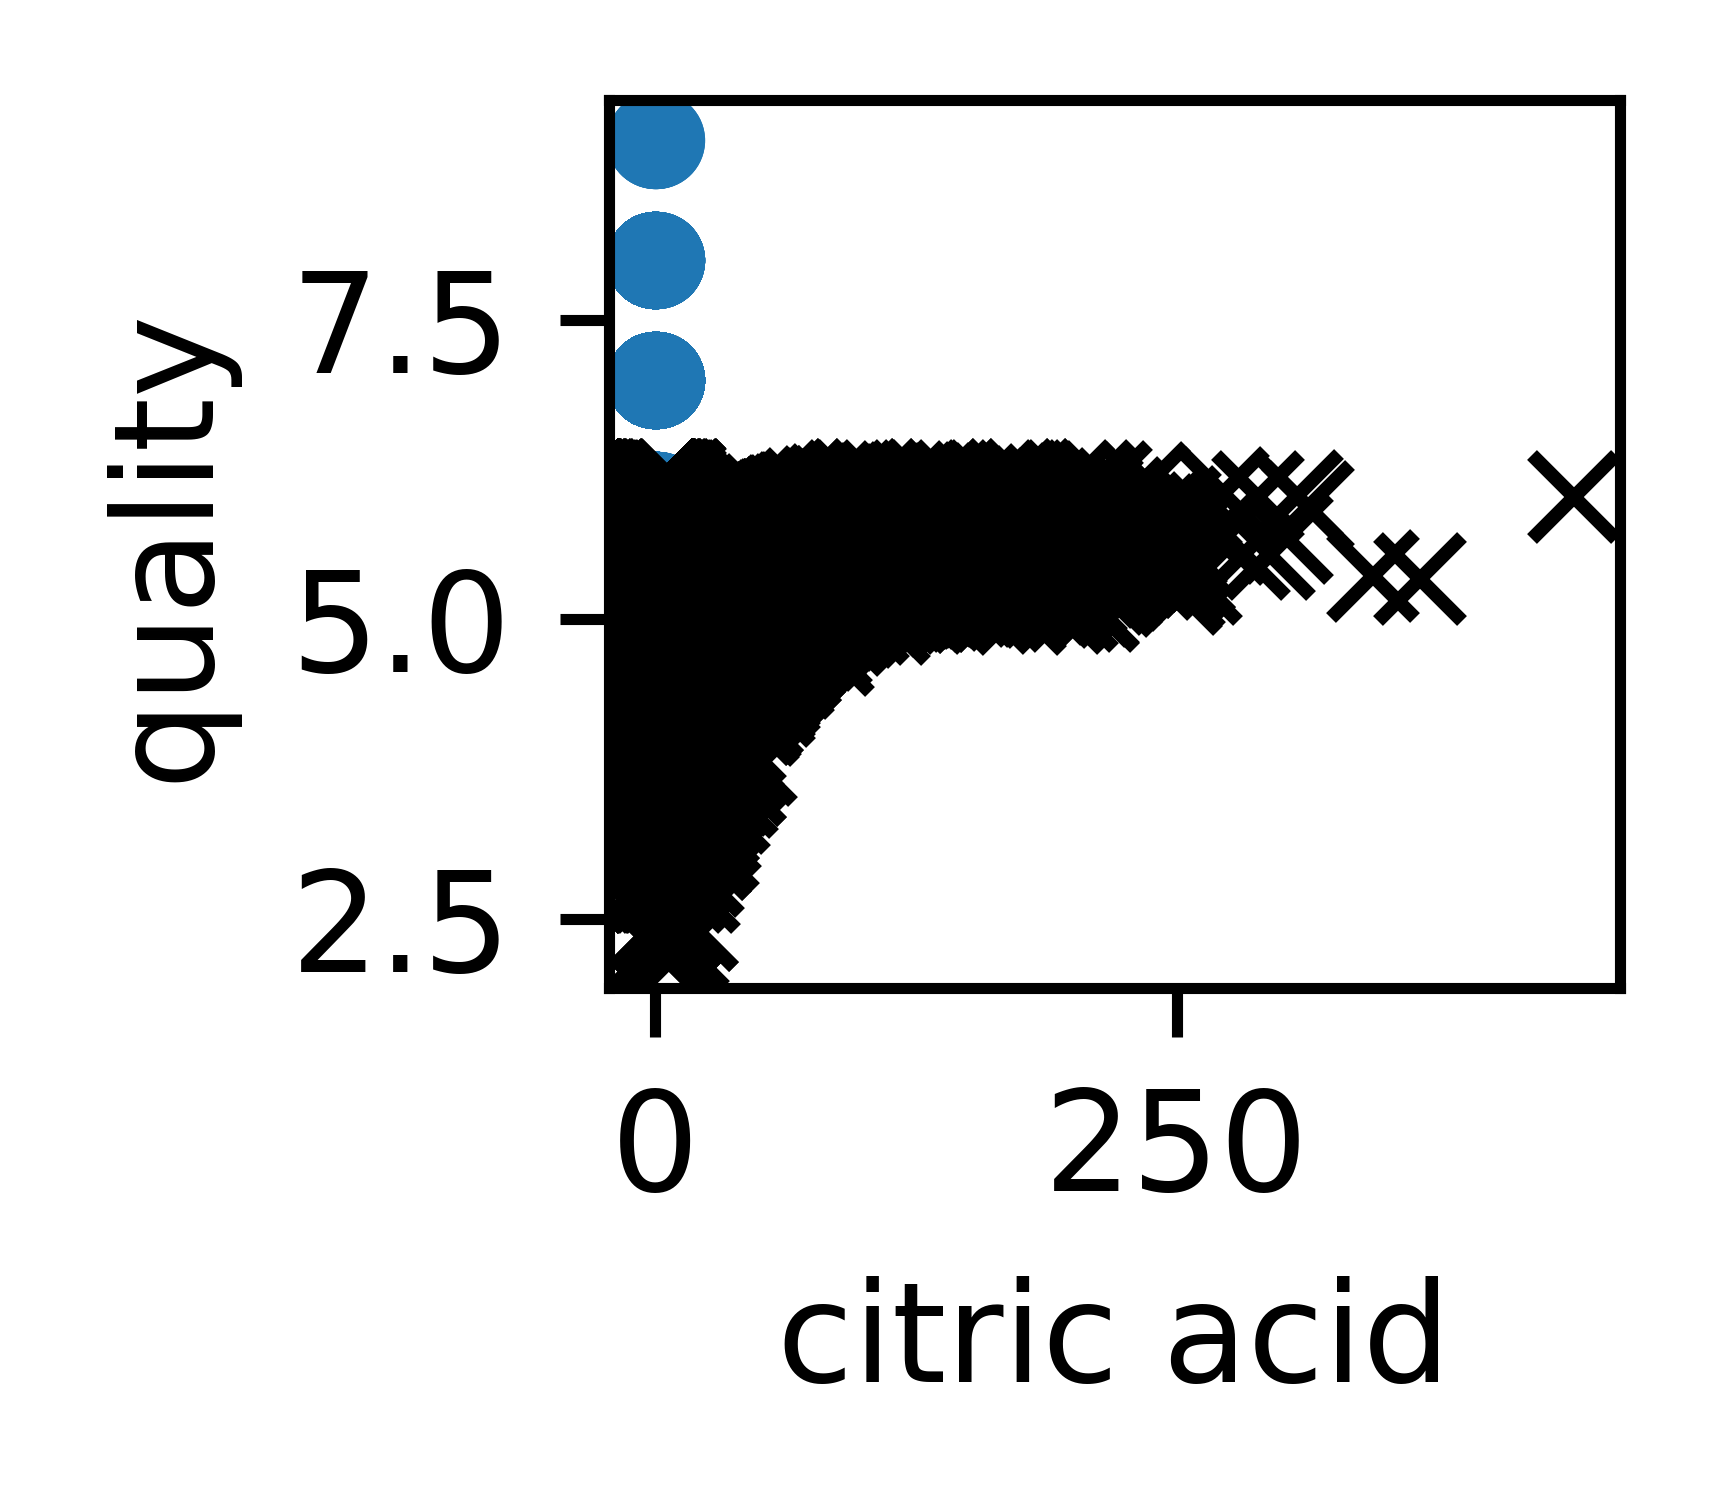

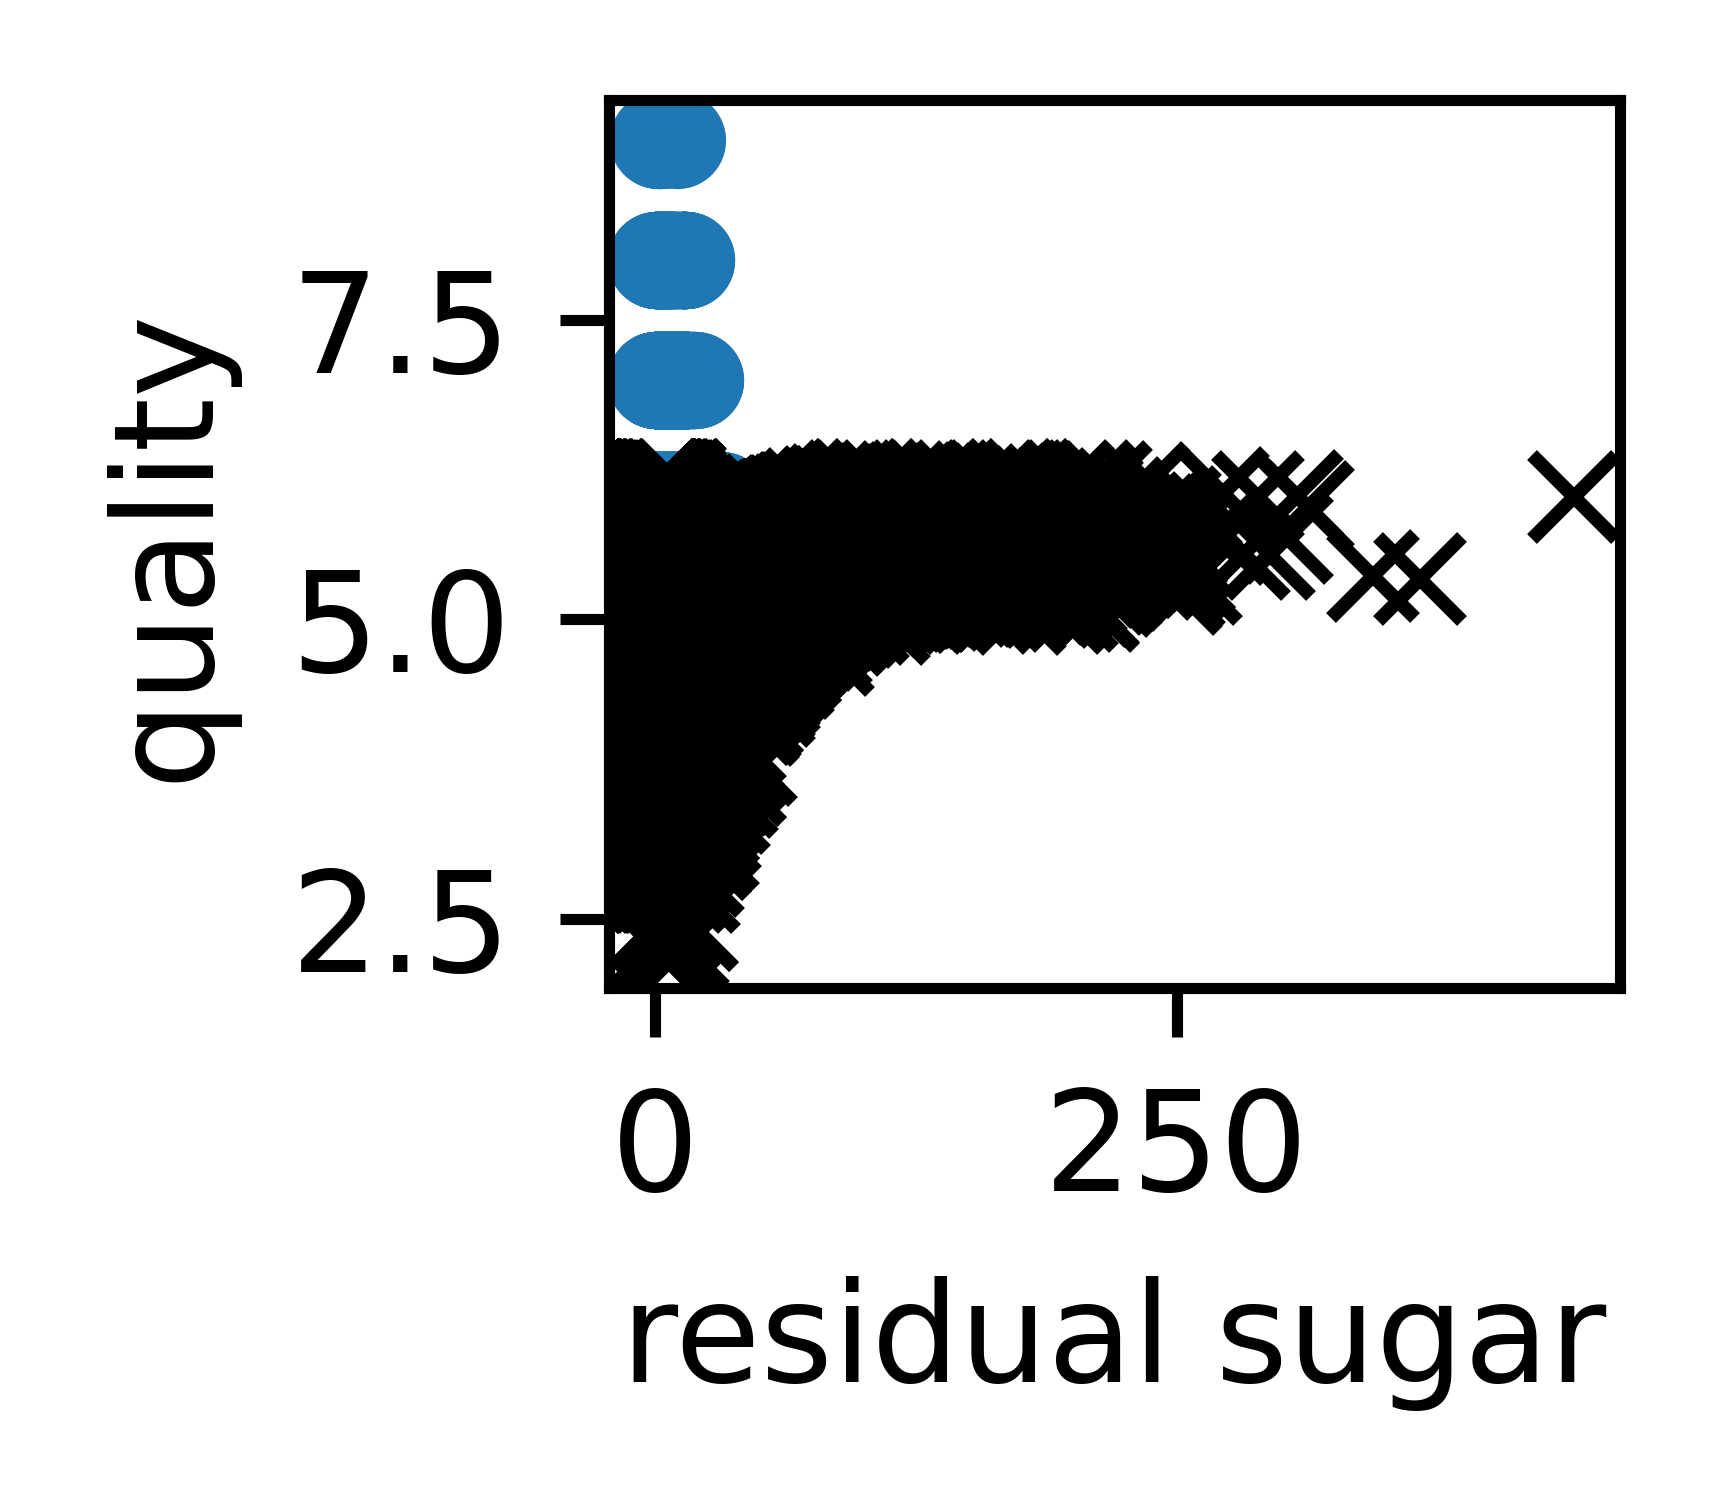

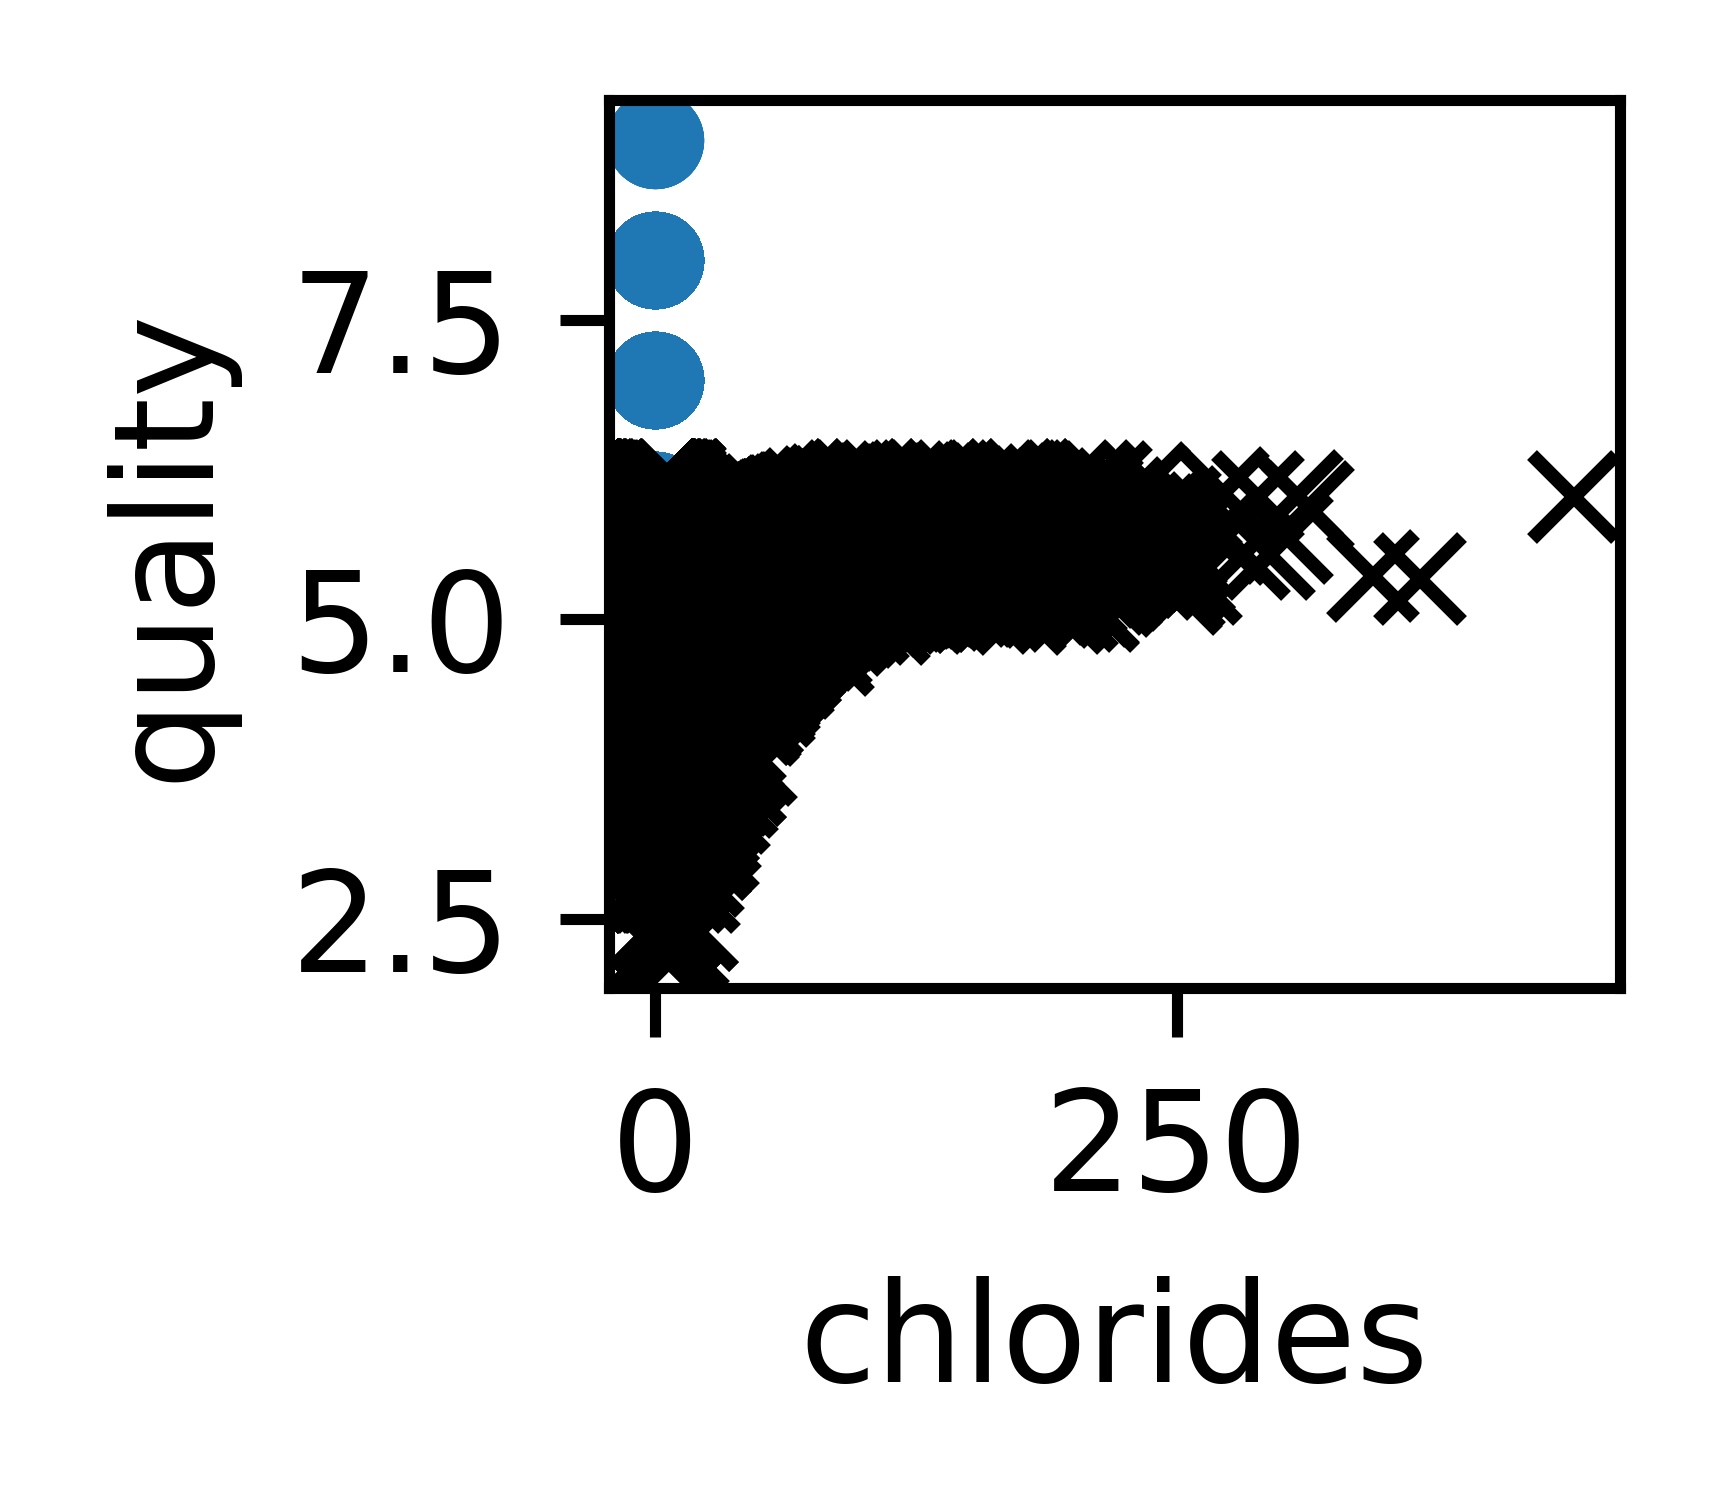

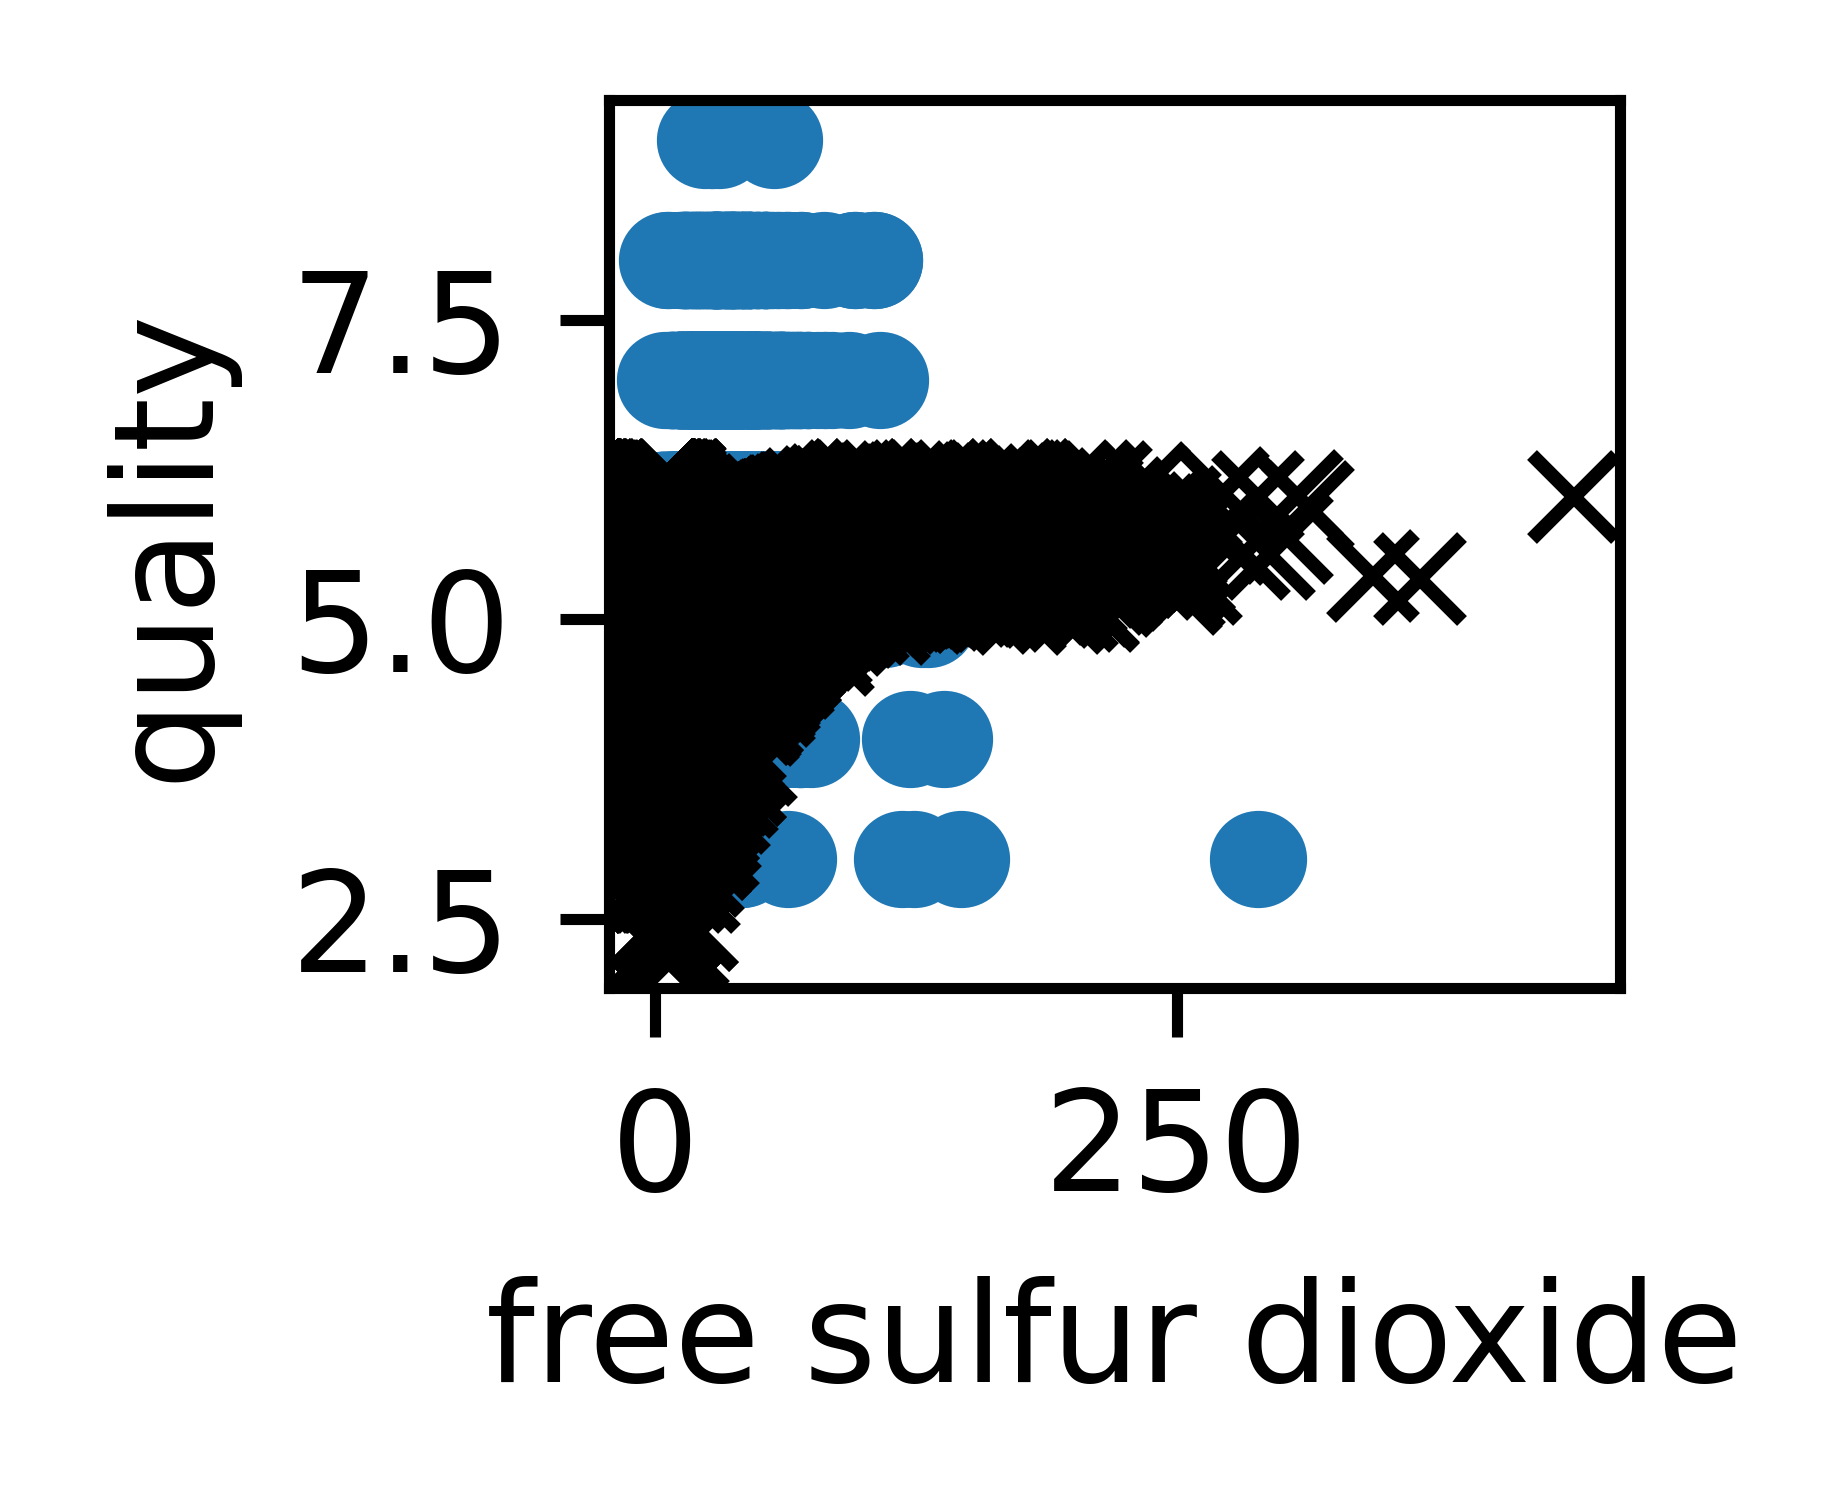

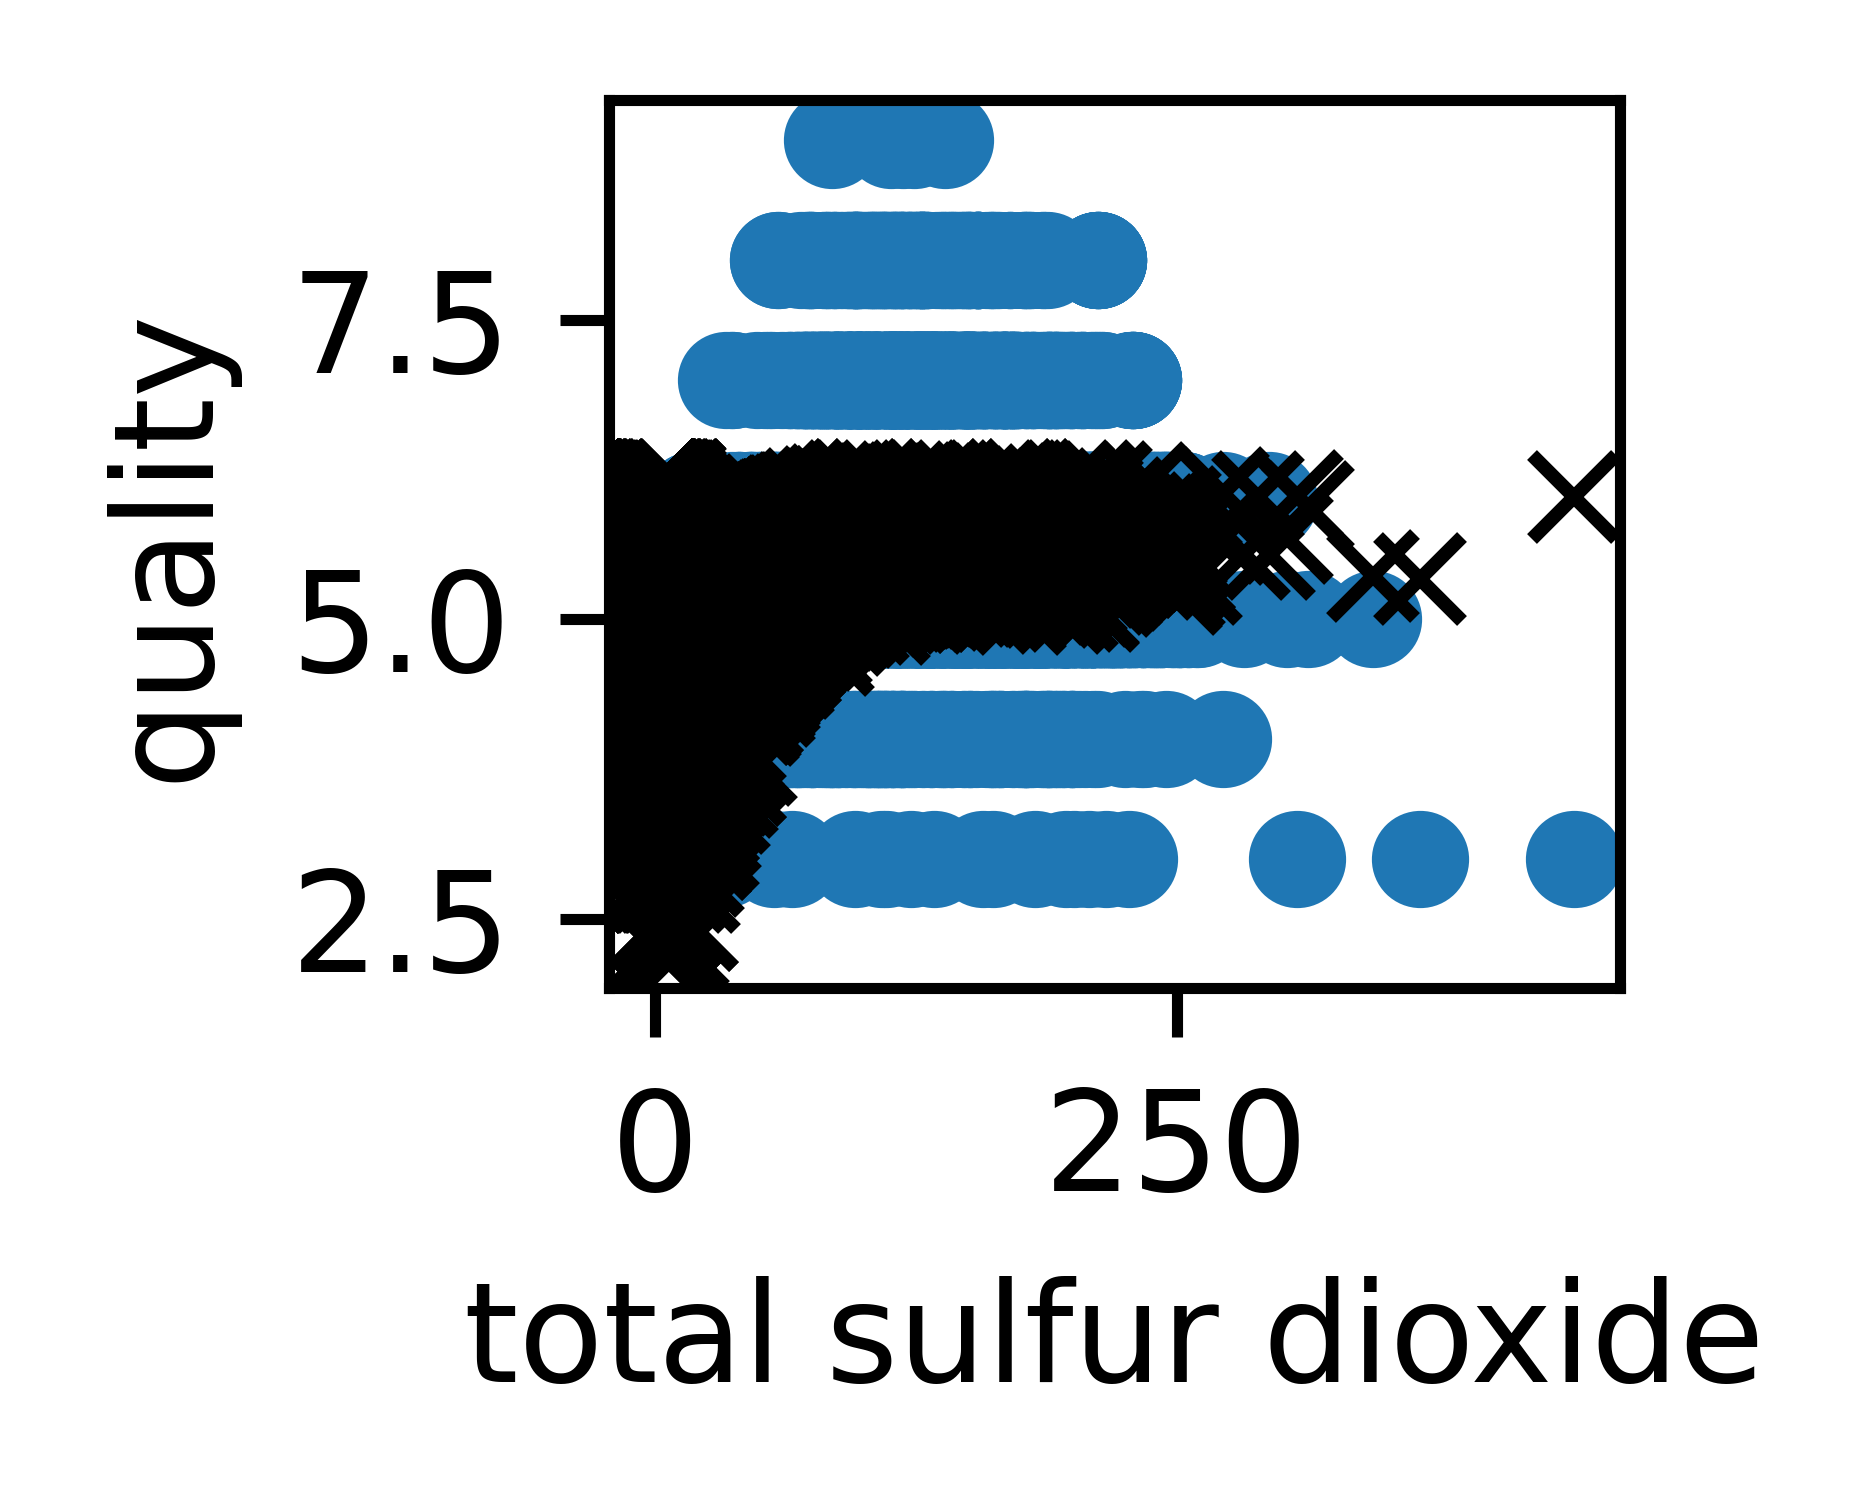

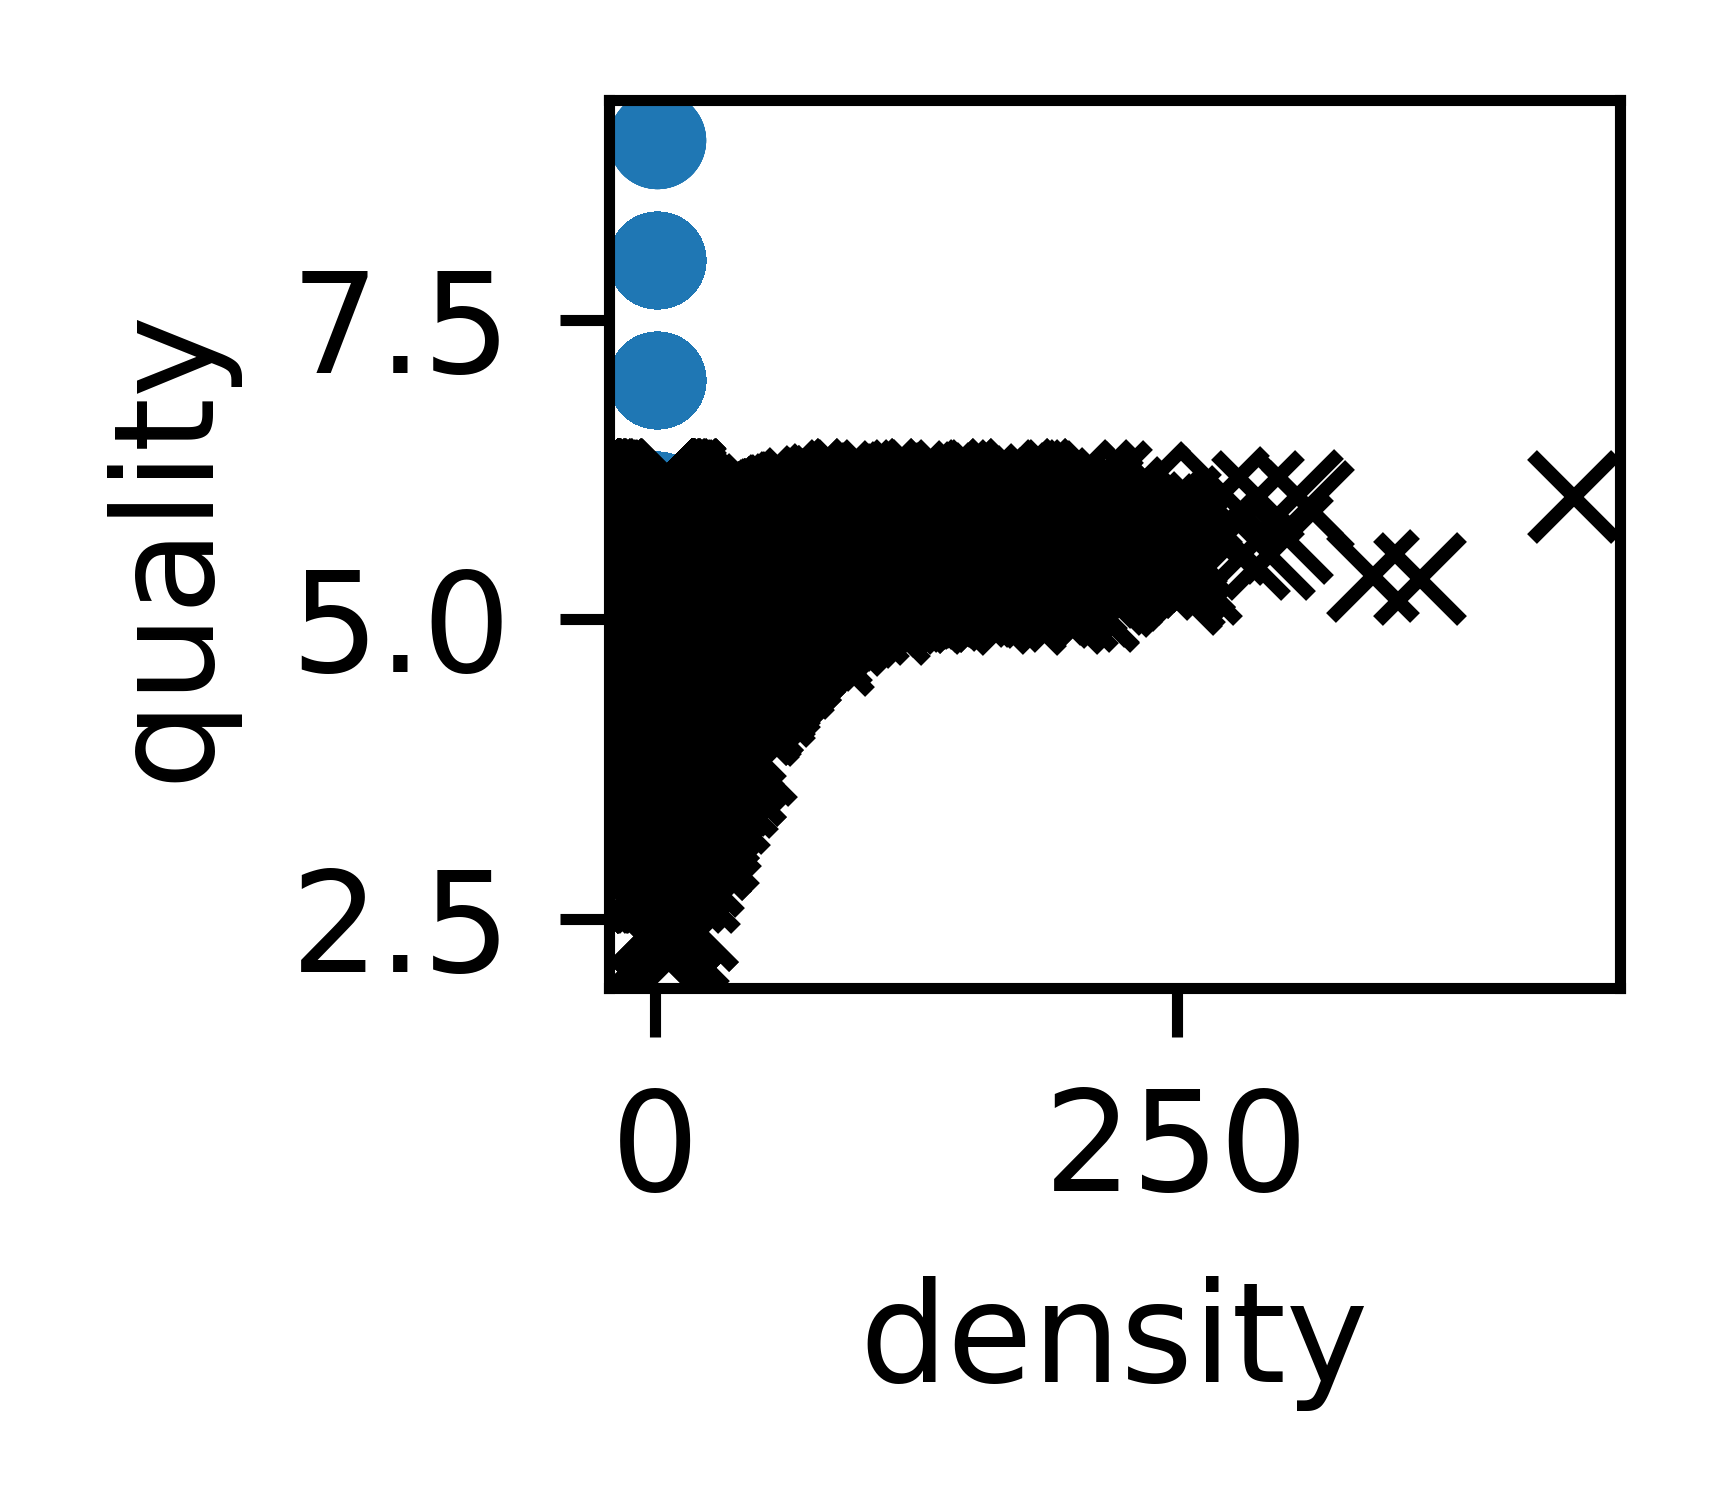

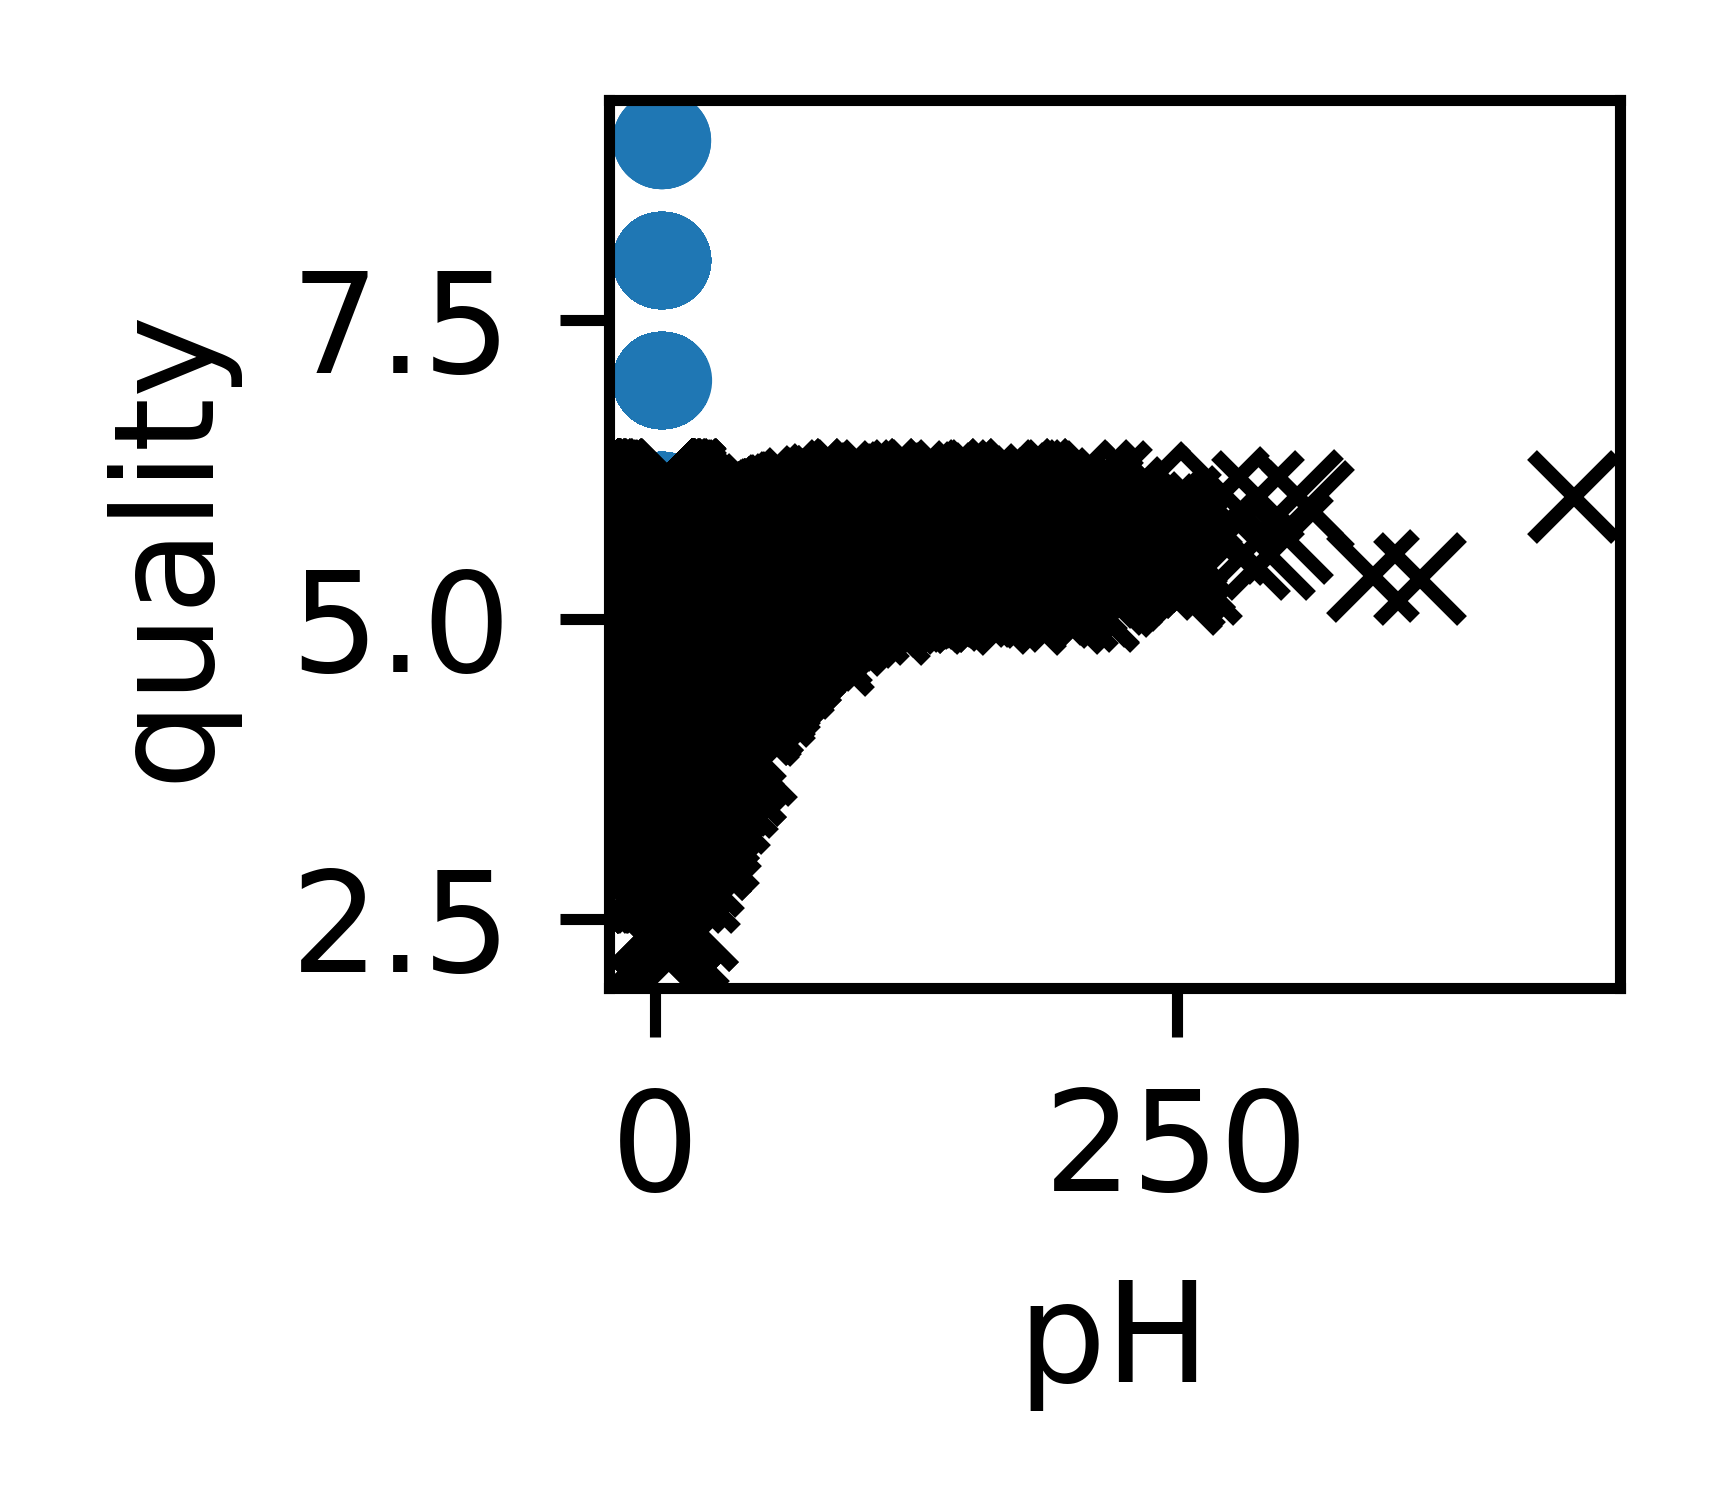

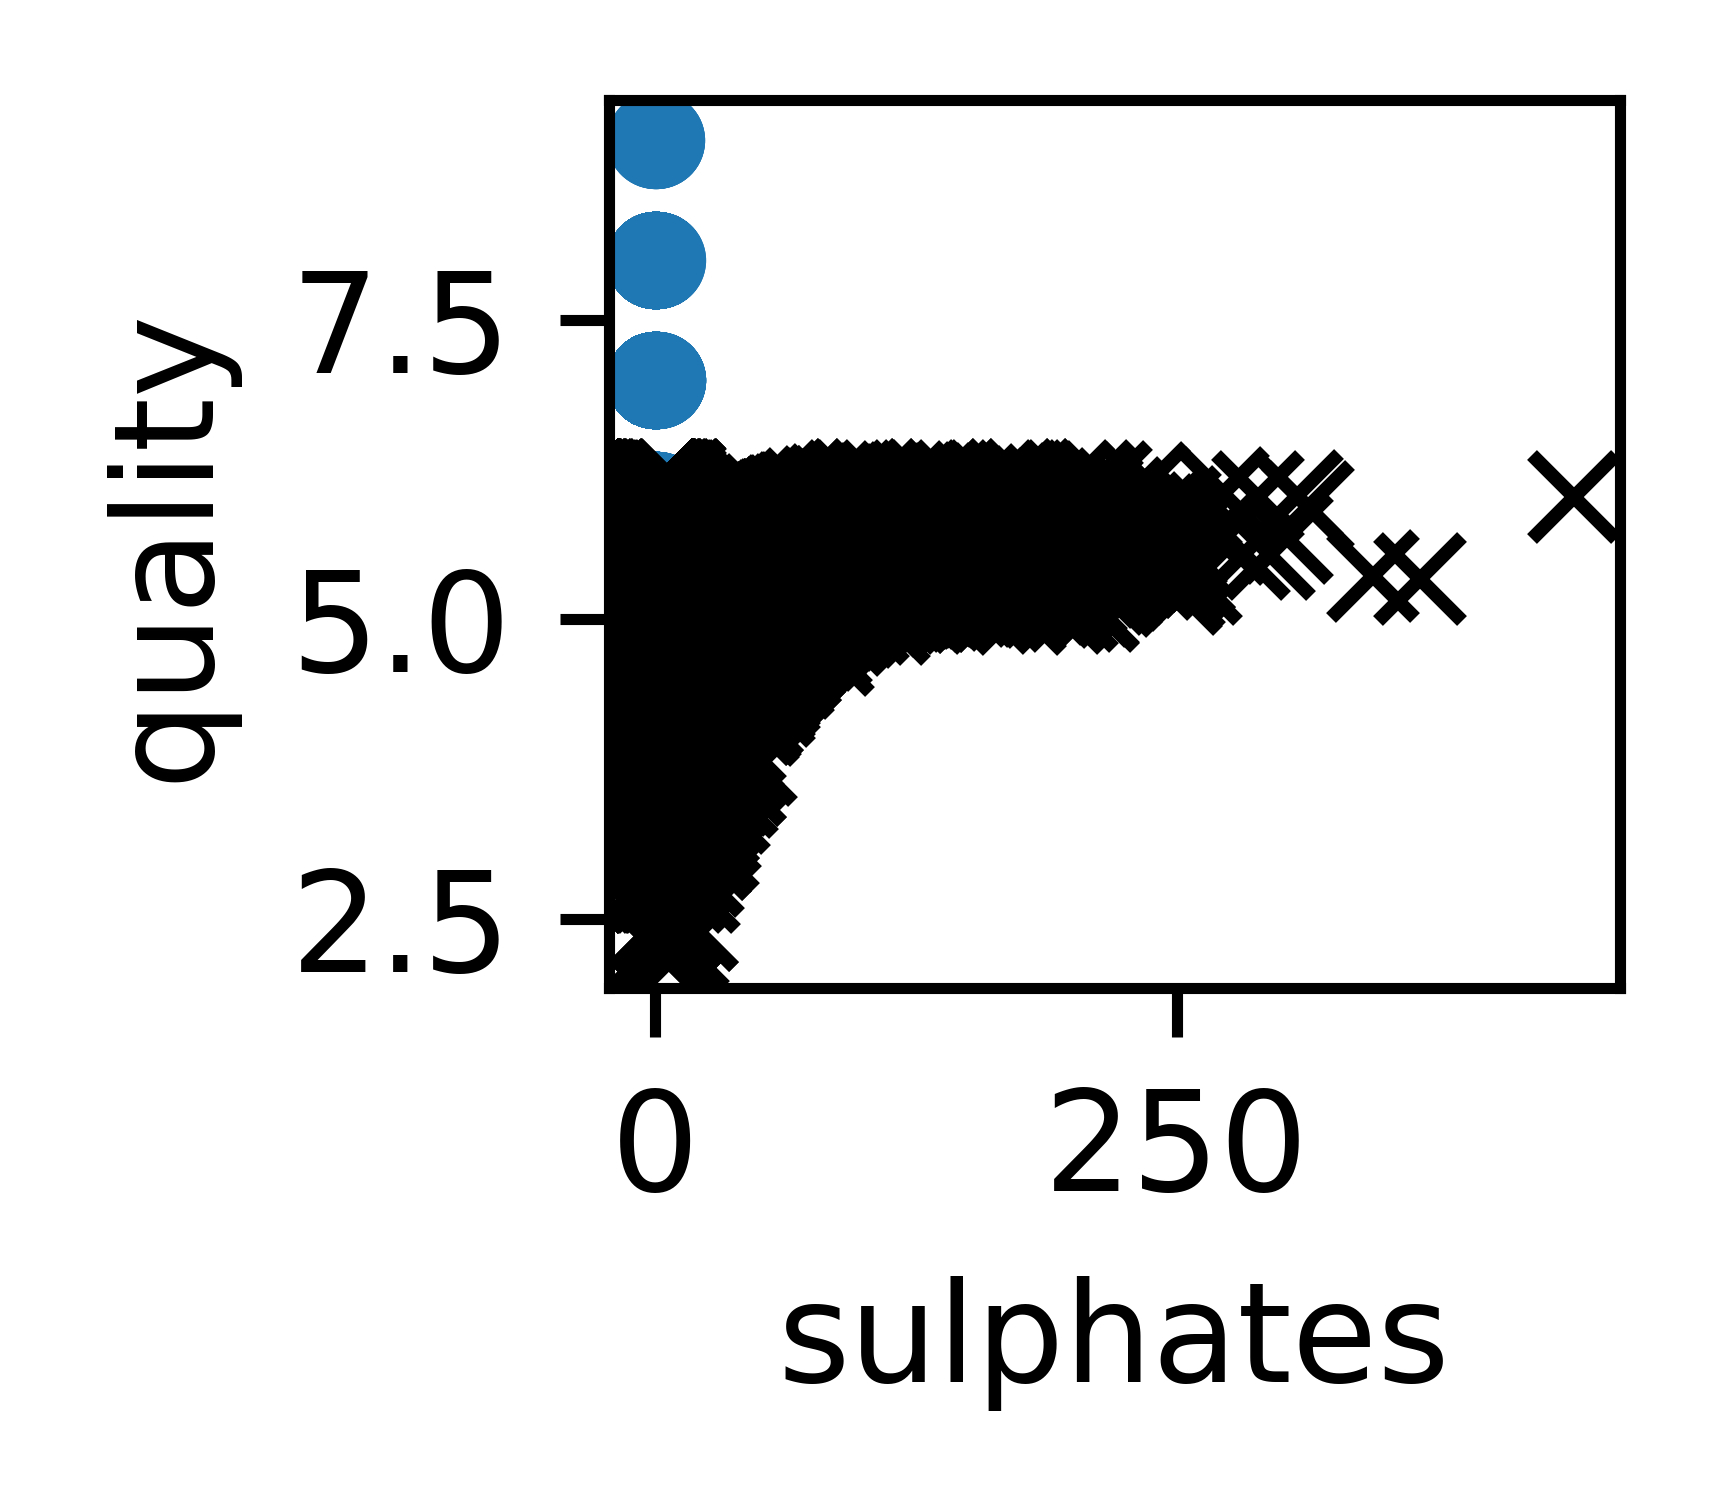

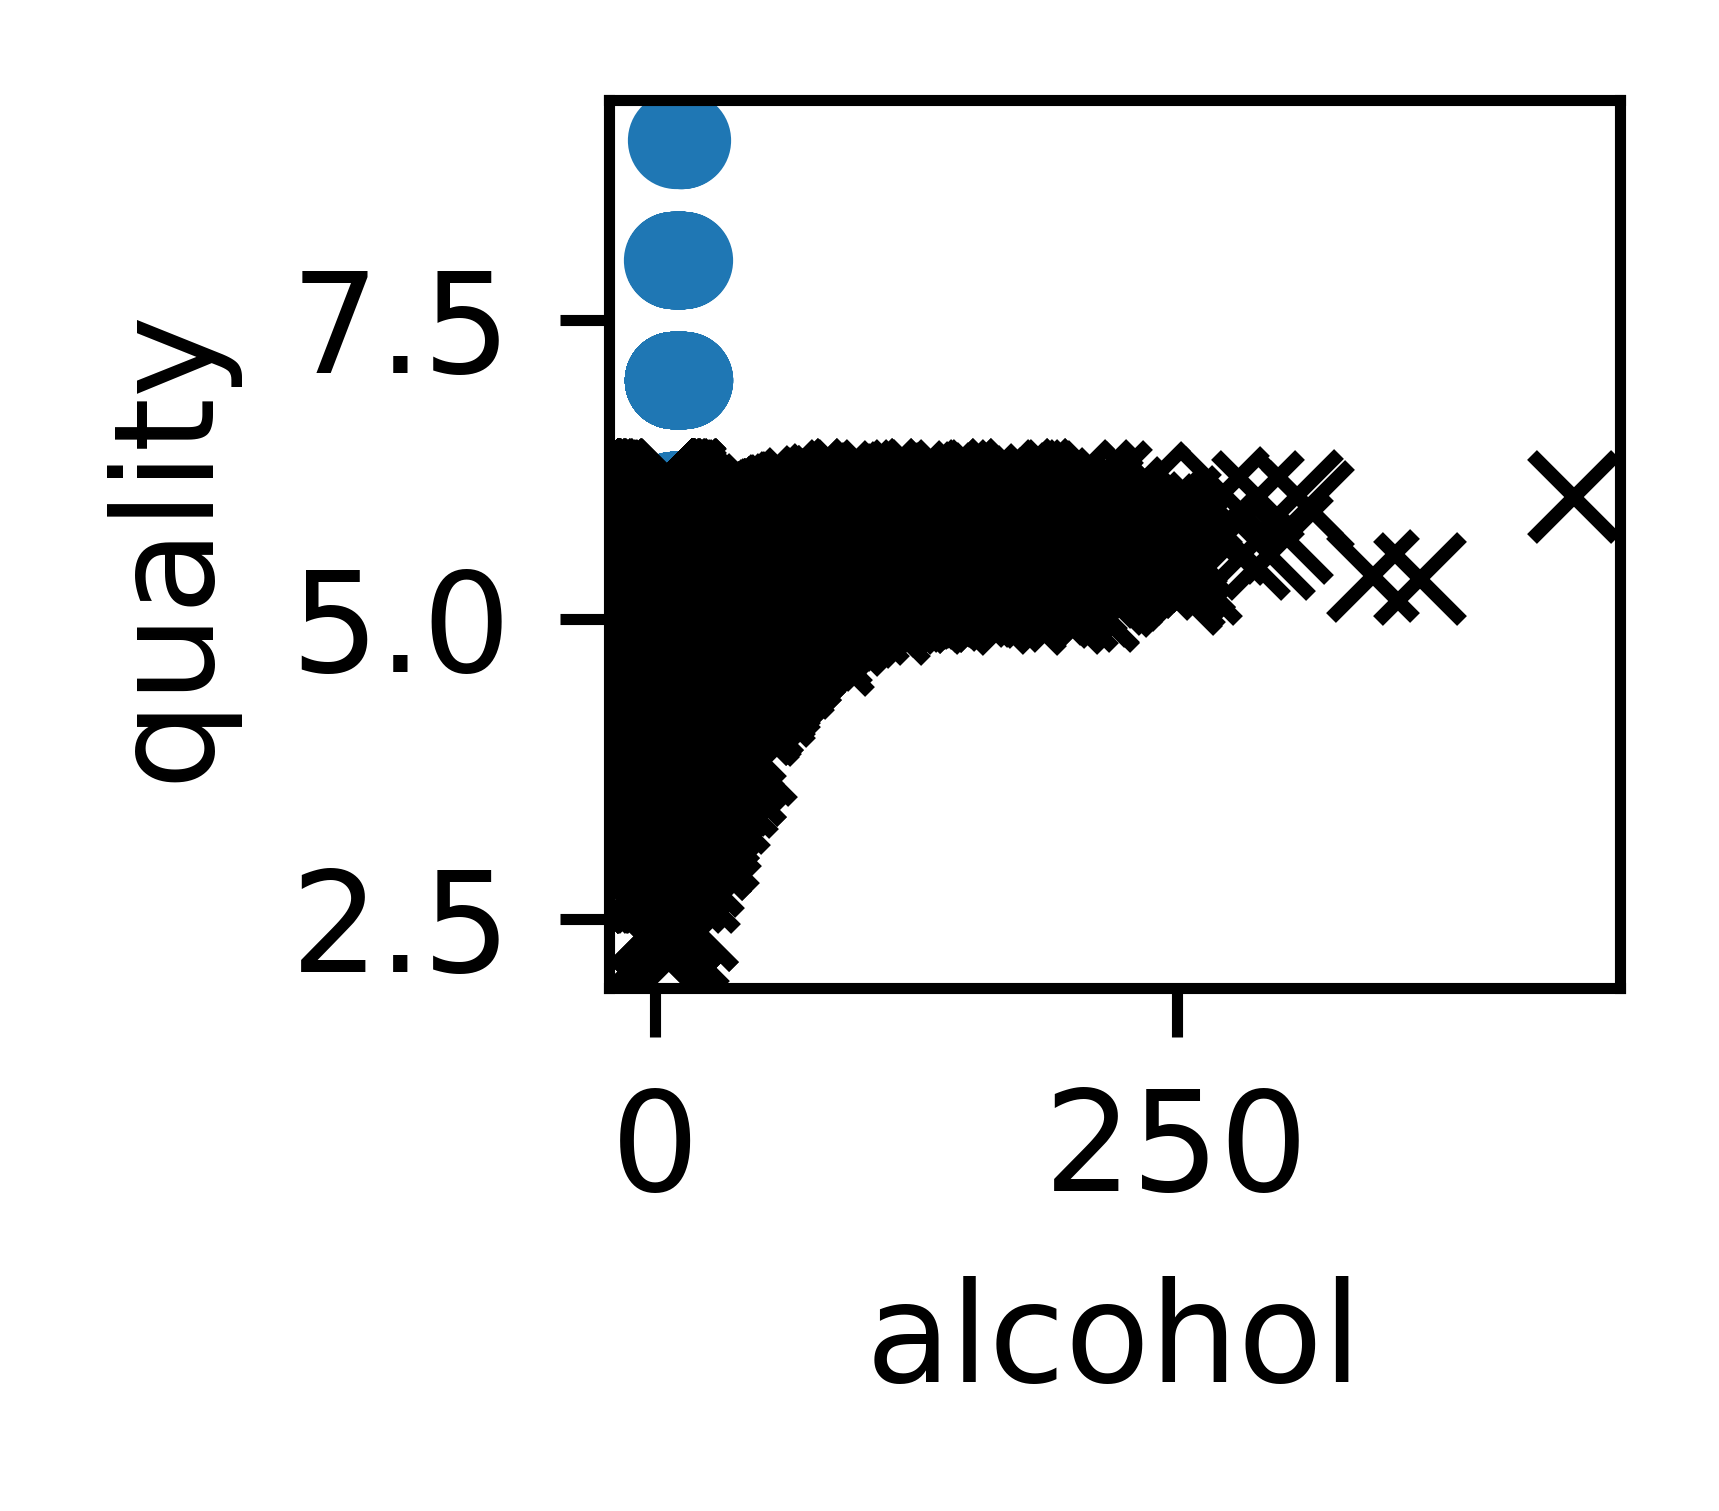

In [ ]:
from matplotlib import pyplot as plt

for i in range(x.shape[1]):
    
    m = x[:, i].min()
    M = x[:, i].max()
    x_range = torch.arange(m, M).unsqueeze(1)
    
    fig = plt.figure(dpi = 1000)
    name = col_list[i]
    plt.subplot(3, 4, 1+i)
    
    plt.xlabel(name)
    plt.ylabel('quality')
    plt.plot(x[:,i].numpy(), y.numpy(), 'o')
    #plt.plot(x_range.numpy(), seq_model(0.1*x_range).detach().numpy(), 'c-')
    plt.plot(x.numpy(), seq_model(0.1 * x).detach().numpy(), 'kx')


In [ ]:
x[:,0].min()

tensor(3.8000)